In [16]:
import warnings
warnings.filterwarnings('ignore')
import mlutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
reload(mlutils)
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML

%matplotlib inline

## Referencias generales

- [Cluster Analysis on Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [Cluster Analysis, Basic concepts and algorithms](https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf)


**Qué es clustering?**

- **Objetivo**: agrupar objetos físicos o obstractos en clases de objetos **similares**
- Es una tarea **NO SUPERVISADA** $\rightarrow$ no sabemos a priorí cómo clasificar nuestros objetos
- Es una tarea por definición **NO COMPLETAMENTE DEFINIDA** $\rightarrow$ ¿Cómo cuantificamos el desempeño de un resultado de clustering?


- ¿Qué definición de **similitud** establecemos?

**Ejemplos de aplicaciones de clustering**

- Taxonomías en biología, agrupaciones por similitud biológica, o incluso genética (big data!!)
- Páginas similares para estructurar resultados de búsquedas (p.ej. La búsqueda de "película" podría devolver resultados agrupados por descripciones similares.
- Segmentación de clientes o usuarios por un criterio de similitud definido.


## Intuición

¿Qué grupos harías con los siguientes datos?,  ¿Cómo sería el proceso?

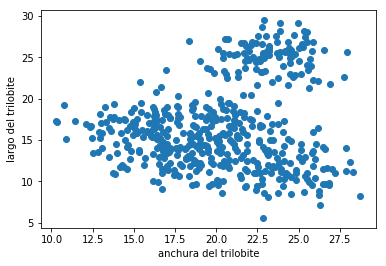

In [13]:
X = pd.read_csv("data/cluster1.csv").values+15
plt.scatter(X[:,0], X[:,1])
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

pseudo código

    input: 
        X: datos
        k: número de clusters deseados
        
    algoritmo:
        1. repite hasta que los k centroides no cambien:
        2.     selecciona k centroides aleatoriamente
        3.     establece k clusters asignado cada dato al centroide más cercano
        4.     recalcula el centroide de cada cluster como el promedio de los datos

In [17]:
h = '<iframe width="560" height="315" src="https://www.youtube.com/embed/BVFG7fd1H30" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>'
HTML(h)

## Centroid based methods -  KMeans


In [32]:
X = pd.read_csv("data/cluster1.csv").values+15
n_clusters = 2

km = KMeans(n_clusters=n_clusters)
km.fit(X)
y = km.predict(X)

In [31]:
pd.Series(y).value_counts()

0    392
1    108
dtype: int64

In [34]:
km.cluster_centers_

array([[19.5061742 , 14.31526768],
       [23.01615594, 24.85357474]])

In [33]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

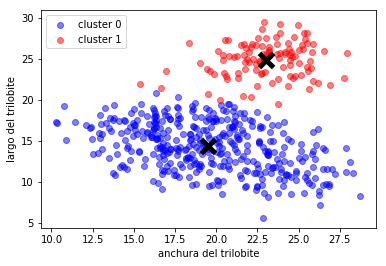

In [44]:
cmap = plt.cm.plasma

cmap((y*255./(n_clusters-1)).astype(int))
for i in np.unique(y):
    cmap = plt.cm.bwr
    col = cmap((i*255./(n_clusters-1)).astype(int))
    Xr = X[y==i]
    plt.scatter(Xr[:,0], Xr[:,1], color=col, label="cluster %d"%i, alpha=.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker="x", lw=5, s=200, color="black")
plt.legend()    
plt.xlabel("anchura del trilobite")
plt.ylabel("largo del trilobite");

observe 2D KMeans clustering with different numbers of clusters

In [20]:
from rlx.utils import show_source
show_source(mlutils.experiment_number_of_clusters)

"<pre style='margin: 0; line-height: 125%; margin: 0; background: #555; background-image: -webkit-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -moz-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -ms-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -o-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-position: 0 0; background-repeat: repeat; background-size: 4.5em 2.5em; '> 1 2 3 4 5 6 7 8 9 10 11 12","<pre style="" margin: 0; background: #555; background-image: -webkit-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -moz-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -ms-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -o-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-position: 0 0; background-repeat: repeat; background-size: 4.5em 2.5em; ; line-height: 125%"">def experiment_number_of_clusters(X, clustering, show_metric=True, plot_data=True, plot_centers=True, plot_boundaries=False): plt.figure(figsize=(15,6)) for n_clusters in pbar()(range(2,10)): clustering.n_clusters = n_clusters y = clustering.fit_predict(X) cm = plt.cm.plasma plt.subplot(2,4,n_clusters-1) plot_cluster_predictions(clustering, X, n_clusters, cm, plot_data, plot_centers, show_metric)"


In [21]:
show_source(mlutils.plot_cluster_predictions)

"<pre style='margin: 0; line-height: 125%; margin: 0; background: #555; background-image: -webkit-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -moz-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -ms-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: -o-linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-image: linear-gradient(#FFFFFF 50%, #F9F9F9 50%); background-position: 0 0; background-repeat: repeat; background-size: 4.5em 2.5em; '> 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33"


100% (8 of 8) |###########################| Elapsed Time: 0:00:02 Time: 0:00:02


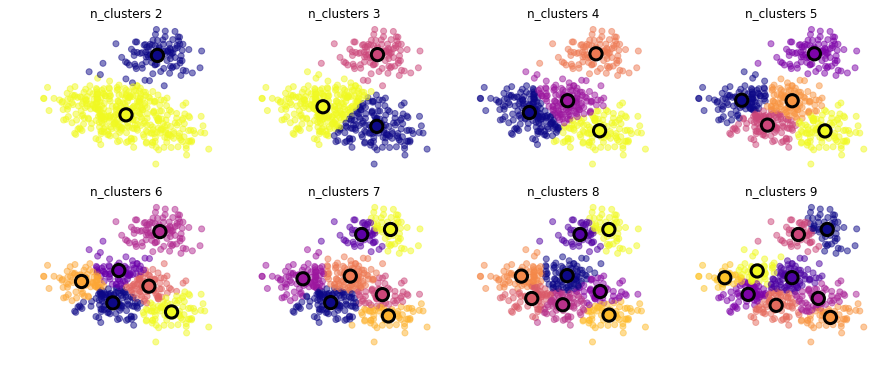

In [3]:
X = pd.read_csv("data/cluster1.csv").values
reload(mlutils)
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=False)

### experiment with different generated datasets

- change `cluster_std` and `centers` parameters in `make_blobs` to generate datasets of different distributions
- what is the _natural_ number of clusters you would use? why is this _natural_?

100% (8 of 8) |##########################| Elapsed Time: 0:00:01 Time:  0:00:01


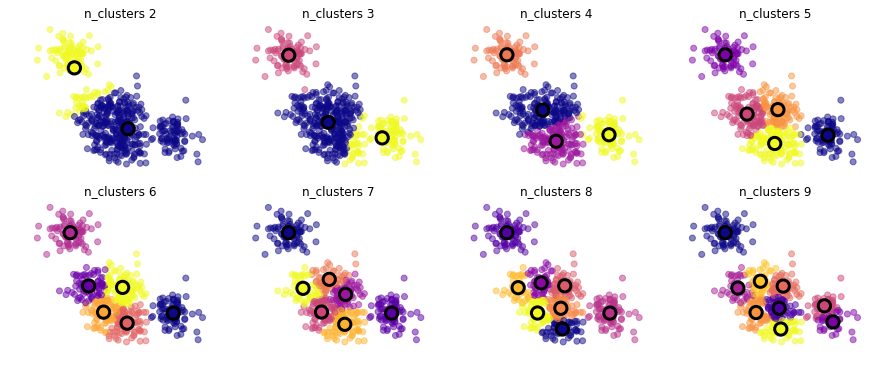

In [11]:
X,_ = make_blobs(500, cluster_std=1.5, centers=6)
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=False)

### How to select the number of clusters? See <a href="https://en.wikipedia.org/wiki/Silhouette_(clustering)">Silhouette Coefficient</a>

100% (8 of 8) |###########################| Elapsed Time: 0:00:02 Time: 0:00:02


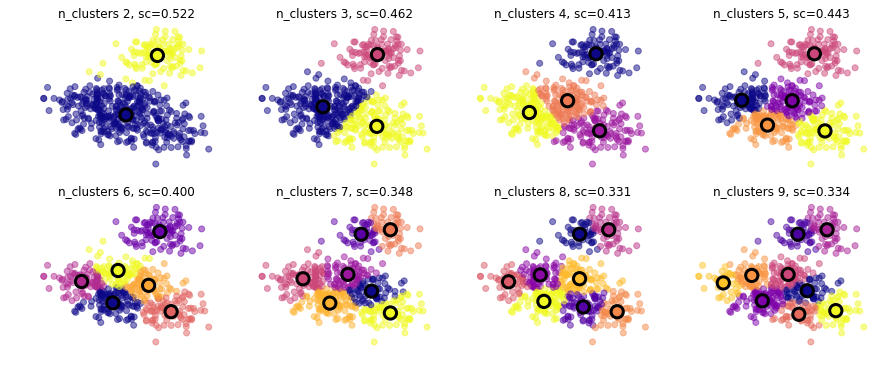

In [6]:
X = pd.read_csv("data/cluster1.csv").values
mlutils.experiment_number_of_clusters(X, KMeans(), show_metric=True)


are the clusters in the following example **_natural_**?

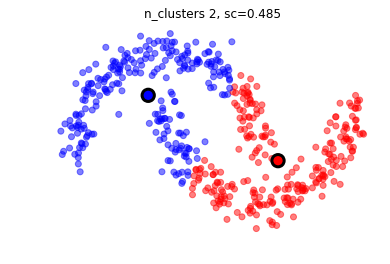

In [7]:
X,_ = make_moons(500, noise=.1)
mlutils.plot_cluster_predictions(KMeans(), X, n_clusters=2,cmap=plt.cm.bwr, show_metric=True)

## Density methods - DBSCAN

must specify $\epsilon$ (max neighborhood radius) and `min_samples`.

is the silhouette metric ok? what metric would you use?

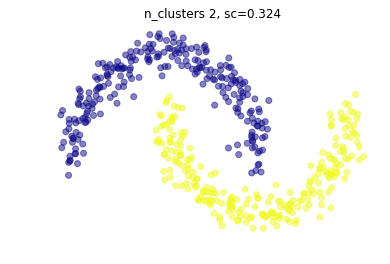

In [8]:
reload(mlutils)
X,_ = make_moons(500, noise=.1)
dbs = DBSCAN(eps=.15, min_samples=4, metric='euclidean')
mlutils.plot_cluster_predictions(dbs, X, cmap=plt.cm.plasma, show_metric=True)

very sensible to $\epsilon$. observe as well that silouhette score is also very sensible to outliers.

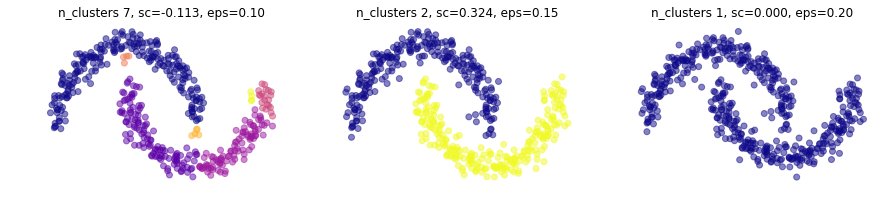

In [9]:
reload(mlutils)
plt.figure(figsize=(15,3))
for i,eps in enumerate([.1,.15,.2]):
    plt.subplot(1,3,i+1)
    mlutils.plot_cluster_predictions(DBSCAN(eps=eps, min_samples=4, metric='euclidean'), X, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", eps=%.2f"%eps)


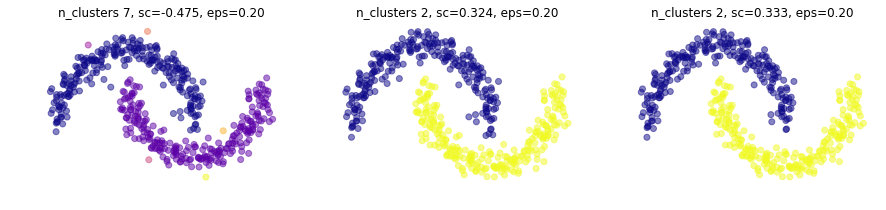

In [10]:
plt.figure(figsize=(15,3))
for i,min_samples in enumerate([1,4,10]):
    plt.subplot(1,3,i+1)
    mlutils.plot_cluster_predictions(DBSCAN(eps=.15, min_samples=min_samples, metric='euclidean'), X, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", eps=%.2f"%eps)


## Connectivity methods - Agglomerative Clustering (Hierarchical)

check the parametres in [sklearn doc](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)  to specify some characterization of the underlying data structure.

observe how we can build k-neighbours connectivity matrix around any point.

In [11]:
X,_ = make_moons(500, noise=.1)

(5.48780141570062, 29.55709961040295)

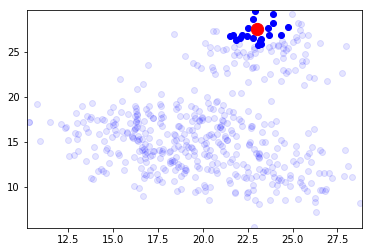

In [49]:
from sklearn.neighbors import kneighbors_graph
i = np.random.randint(len(X))
knn_graph = kneighbors_graph(X, 20, include_self=False)

nn = X[knn_graph[i].toarray()[0].astype(bool)]
plt.scatter(nn[:,0], nn[:,1], color="blue", alpha=1)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.1)
plt.scatter(X[i,0], X[i,1], s=150, color="red")
plt.xlim(np.min(X[:,0])-.1, np.max(X[:,0])+.1)
plt.ylim(np.min(X[:,1])-.1, np.max(X[:,1])+.1)

we use this connectivity matrix to provide structure info to the algorithm

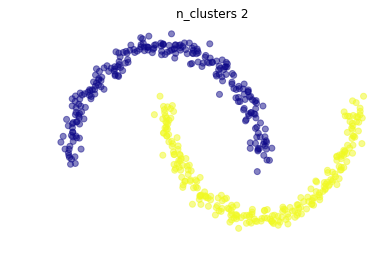

In [50]:
from sklearn.neighbors import kneighbors_graph
X,_ = make_moons(500, noise=.05)
knn_graph = kneighbors_graph(X, 20, include_self=False)
ac = AgglomerativeClustering(connectivity=knn_graph, linkage="average")

mlutils.plot_cluster_predictions(ac, X, n_clusters=2, cmap=plt.cm.plasma)

observe the response to different neighborhood sizes.

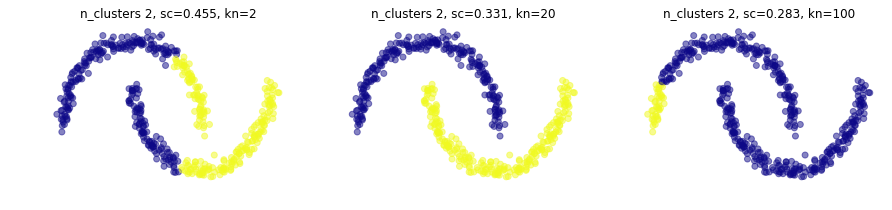

In [17]:
plt.figure(figsize=(15,3))
for i,kn in enumerate([2,20,100]):
    plt.subplot(1,3,i+1)
    knn_graph = kneighbors_graph(X, kn, include_self=False)
    mlutils.plot_cluster_predictions(AgglomerativeClustering(connectivity=knn_graph, linkage="average"), X, 
                                     n_clusters=2, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", kn=%d"%kn)

and to different noise levels in the dataset

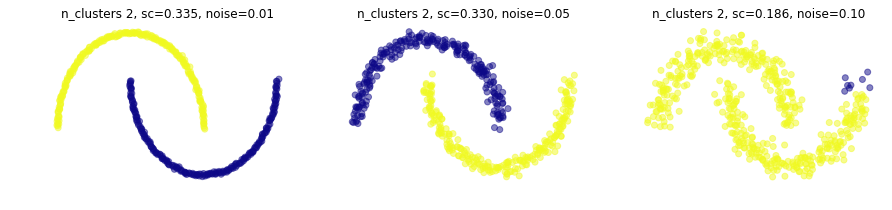

In [18]:
plt.figure(figsize=(15,3))
for i,noise in enumerate([.01,.05,.1]):
    plt.subplot(1,3,i+1)
    X,_ = make_moons(500, noise=noise)
    knn_graph = kneighbors_graph(X, 20, include_self=False)
    mlutils.plot_cluster_predictions(AgglomerativeClustering(connectivity=knn_graph, linkage="average"), X, 
                                     n_clusters=2, 
                                     cmap=plt.cm.plasma, show_metric=True, title_str=", noise=%.2f"%noise)

# Experiment

observe clustering result with different synthetic datasets and algorithms.

- See [dataset generation](http://scikit-learn.org/stable/modules/classes.html#samples-generator) in sklearn.
- See [comparing clustering](http://scikit-learn.org/0.18/auto_examples/cluster/plot_cluster_comparison.html) on toy datasets.

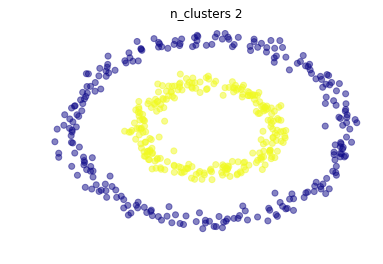

In [19]:
from sklearn import datasets
X,_ = datasets.make_circles(500, noise=.05, factor=.5)
knn_graph = kneighbors_graph(X, 10, include_self=False)
ac = AgglomerativeClustering(connectivity=knn_graph, linkage="average")
mlutils.plot_cluster_predictions(ac, X, n_clusters=2, cmap=plt.cm.plasma)

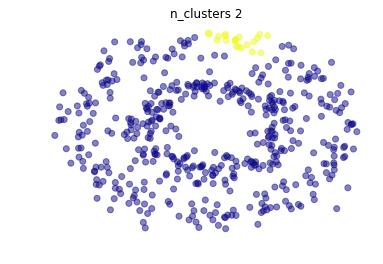

In [20]:
from sklearn import datasets
X,_ = datasets.make_circles(500, noise=.1, factor=.5)
knn_graph = kneighbors_graph(X, 50, include_self=False)
ac = AgglomerativeClustering(connectivity=knn_graph, linkage="average")
mlutils.plot_cluster_predictions(ac, X, n_clusters=2, cmap=plt.cm.plasma)